# Sadaa Vijayee Project 1

### Predictive Modeling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier


In [2]:
df = pd.read_csv("cleaned_healthcare_dataset.csv")

print("Dataset Shape:", df.shape)
print(df.head())

Dataset Shape: (51173, 27)
               Name  Age  Gender Blood_Type Medical_Condition  \
0    Robert Nichols   61    Male         O+            Cancer   
1    William Zavala   53  Female         A+           Obesity   
2  Danielle Gregory   57  Female         A+            Asthma   
3     Michael Smith   17  Female         A-           Obesity   
4  Kimberly Bridges   68  Female         B+      Hypertension   

  Date_of_Admission Discharge_Date Admission_Type  Room_Number  \
0        2019-05-18     2019-05-22      Emergency          353   
1        2021-01-04     2021-02-03      Emergency          369   
2        2024-04-21     2024-04-24       Elective          353   
3        2020-07-17     2020-07-31         Urgent          128   
4        2019-07-31     2019-08-24      Emergency          366   

            Doctor  ... BMI_Category Systolic_BP  Diastolic_BP Cholesterol  \
0        Aaron Fox  ...       Normal       120.0          80.0      Normal   
1       Mark Allen  ...      

In [3]:
df["Billing_Amount"] = pd.to_numeric(df["Billing_Amount"], errors="coerce")

df["Heart_Disease_Risk"] = df["Heart_Disease_Risk"].map({"Yes": 1, "No": 0})

df["Gender"] = df["Gender"].map({"Male": 0, "Female": 1})

df["Smoke"] = df["Smoke"].map({"No": 0, "Yes": 1})
df["Alcohol_Intake"] = df["Alcohol_Intake"].map({"No": 0, "Yes": 1})
df["Physically_Active"] = df["Physically_Active"].map({"No": 0, "Yes": 1})

le = LabelEncoder()
df["BMI_Category"] = le.fit_transform(df["BMI_Category"])

df = pd.get_dummies(df, columns=["Cholesterol", "Glucose"], drop_first=True)


In [4]:
model_cols = [
    "Age", "Gender", "Room_Number", "Billing_Amount",
    "Height", "Weight", "BMI", "BMI_Category",
    "Systolic_BP", "Diastolic_BP",
    "Smoke", "Alcohol_Intake", "Physically_Active",
    "Lifestyle_Index",
    "Cholesterol_Normal", "Cholesterol_Severe",
    "Glucose_Normal", "Glucose_Severe"
]

X = df[model_cols]
y = df["Heart_Disease_Risk"]

print("\nFinal ML Columns:", X.columns)



Final ML Columns: Index(['Age', 'Gender', 'Room_Number', 'Billing_Amount', 'Height', 'Weight',
       'BMI', 'BMI_Category', 'Systolic_BP', 'Diastolic_BP', 'Smoke',
       'Alcohol_Intake', 'Physically_Active', 'Lifestyle_Index',
       'Cholesterol_Normal', 'Cholesterol_Severe', 'Glucose_Normal',
       'Glucose_Severe'],
      dtype='object')


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

In [6]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


LOGISTIC REGRESSION RESULTS
Accuracy: 0.7349538846334219
              precision    recall  f1-score   support

           0       0.72      0.83      0.78      7012
           1       0.75      0.62      0.68      5782

    accuracy                           0.73     12794
   macro avg       0.74      0.72      0.73     12794
weighted avg       0.74      0.73      0.73     12794



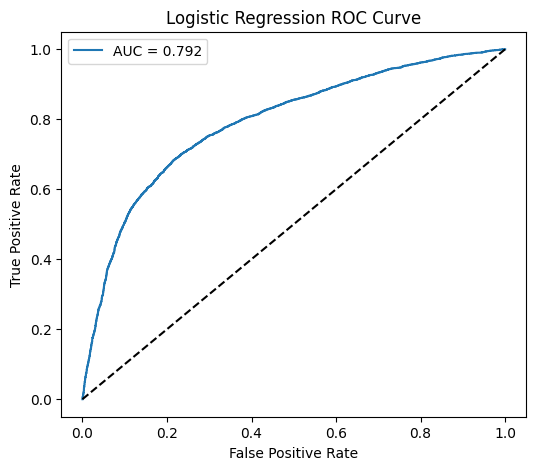

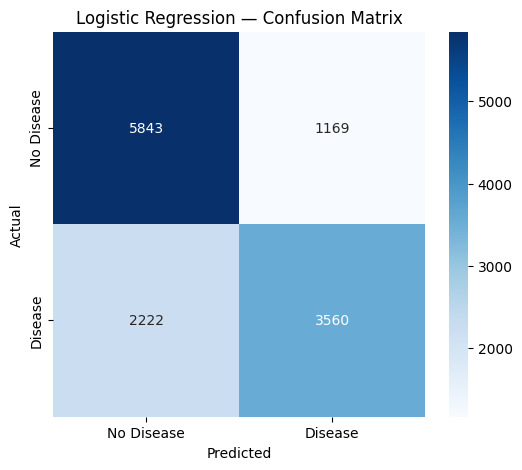

In [7]:
# MODEL 1 — LOGISTIC REGRESSION

lr = LogisticRegression(max_iter=3000, solver="lbfgs")
lr.fit(X_train_scaled, y_train)

lr_pred = lr.predict(X_test_scaled)

print("LOGISTIC REGRESSION RESULTS")
print("Accuracy:", lr.score(X_test_scaled, y_test))
print(classification_report(y_test, lr_pred))

lr_prob = lr.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, lr_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1],[0,1], 'k--')
plt.title("Logistic Regression ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


cm_lr = confusion_matrix(y_test, lr_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Disease", "Disease"],
            yticklabels=["No Disease", "Disease"])
plt.title("Logistic Regression — Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()


DECISION TREE RESULTS
Accuracy: 0.7316710958261685
              precision    recall  f1-score   support

           0       0.73      0.81      0.77      7012
           1       0.73      0.64      0.68      5782

    accuracy                           0.73     12794
   macro avg       0.73      0.72      0.72     12794
weighted avg       0.73      0.73      0.73     12794



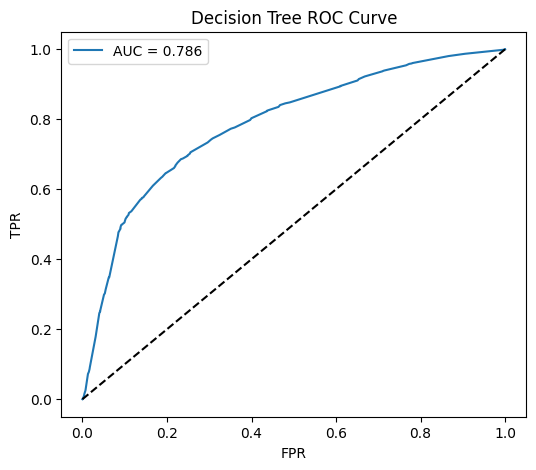

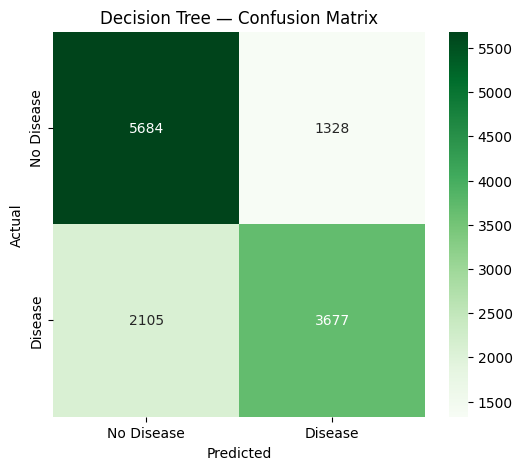

In [8]:
# MODEL 2 — DECISION TREE

dt = DecisionTreeClassifier(
    max_depth=8,
    min_samples_split=20,
    random_state=42
)
dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)

print("DECISION TREE RESULTS")
print("Accuracy:", dt.score(X_test, y_test))
print(classification_report(y_test, dt_pred))

dt_prob = dt.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, dt_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1],[0,1], 'k--')
plt.title("Decision Tree ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()

cm_dt = confusion_matrix(y_test, dt_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Greens",
            xticklabels=["No Disease", "Disease"],
            yticklabels=["No Disease", "Disease"])
plt.title("Decision Tree — Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()


RANDOM FOREST RESULTS
Accuracy: 0.7427700484602158
              precision    recall  f1-score   support

           0       0.73      0.84      0.78      7012
           1       0.77      0.62      0.69      5782

    accuracy                           0.74     12794
   macro avg       0.75      0.73      0.73     12794
weighted avg       0.75      0.74      0.74     12794



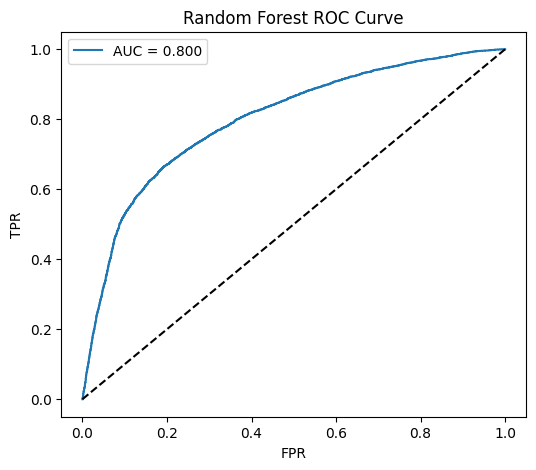

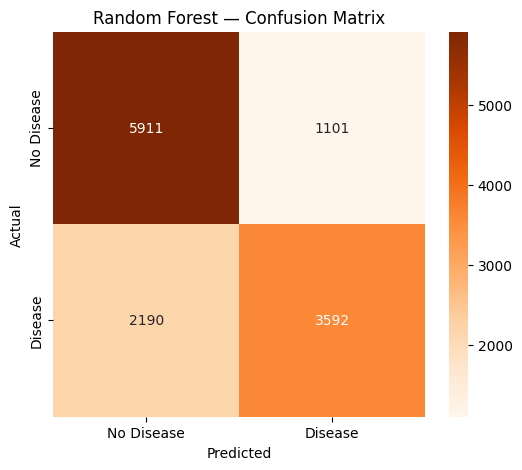

In [9]:
# MODEL 3 — RANDOM FOREST

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=12,
    random_state=42
)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

print("RANDOM FOREST RESULTS")
print("Accuracy:", rf.score(X_test, y_test))
print(classification_report(y_test, rf_pred))

rf_prob = rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, rf_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1],[0,1], 'k--')
plt.title("Random Forest ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()

cm_rf = confusion_matrix(y_test, rf_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Oranges",
            xticklabels=["No Disease", "Disease"],
            yticklabels=["No Disease", "Disease"])
plt.title("Random Forest — Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()


XGBOOST RESULTS
Accuracy: 0.738705643270283
              precision    recall  f1-score   support

           0       0.73      0.82      0.78      7012
           1       0.75      0.64      0.69      5782

    accuracy                           0.74     12794
   macro avg       0.74      0.73      0.73     12794
weighted avg       0.74      0.74      0.74     12794



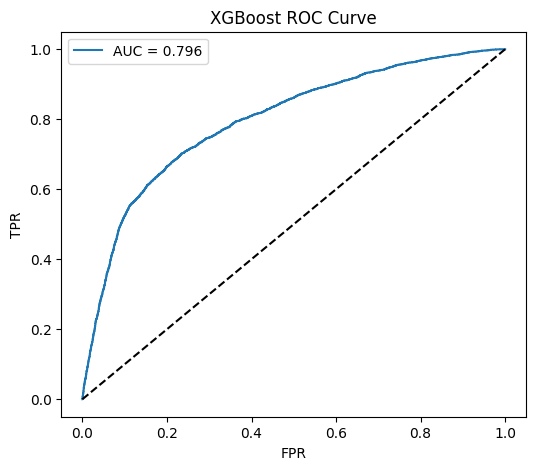

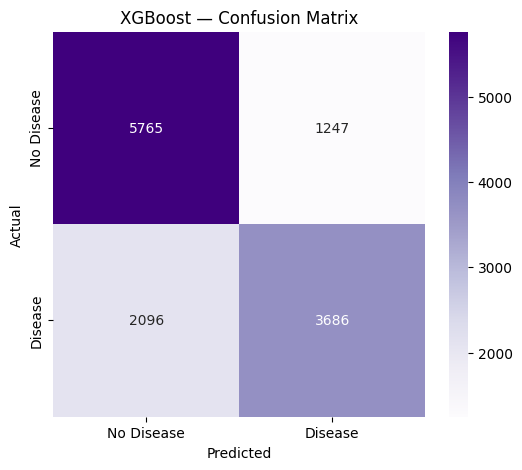

In [10]:
# MODEL 4 — XGBOOST

xgb = XGBClassifier(
    n_estimators=250,
    learning_rate=0.08,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    eval_metric='logloss'
)
xgb.fit(X_train, y_train)

xgb_pred = xgb.predict(X_test)

print("XGBOOST RESULTS")
print("Accuracy:", xgb.score(X_test, y_test))
print(classification_report(y_test, xgb_pred))

xgb_prob = xgb.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, xgb_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1],[0,1], 'k--')
plt.title("XGBoost ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()

cm_xgb = confusion_matrix(y_test, xgb_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Purples",
            xticklabels=["No Disease", "Disease"],
            yticklabels=["No Disease", "Disease"])
plt.title("XGBoost — Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()


In [11]:
# FINAL MODEL COMPARISON TABLE

results = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest", "XGBoost"],
    "Accuracy": [
        lr.score(X_test_scaled, y_test),
        dt.score(X_test, y_test),
        rf.score(X_test, y_test),
        xgb.score(X_test, y_test)
    ]
})

print("FINAL MODEL PERFORMANCE SUMMARY")
print(results)

FINAL MODEL PERFORMANCE SUMMARY
                 Model  Accuracy
0  Logistic Regression  0.734954
1        Decision Tree  0.731671
2        Random Forest  0.742770
3              XGBoost  0.738706
